<a href="https://colab.research.google.com/github/LokiAndere/After_MIARFID/blob/main/noice_reduction_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

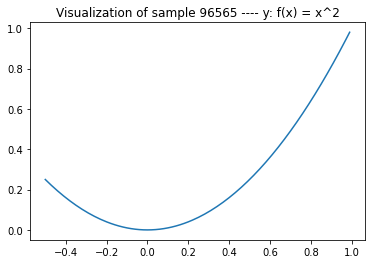

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample configuration
num_samples = 100000

# Intrasample configuration
num_elements = 1
interval_per_element = 0.01
total_num_elements = int(num_elements / interval_per_element)
starting_point = int(0 - 0.5*total_num_elements)

# Other configuration
num_samples_visualize = 1

# Containers for samples and subsamples
samples = []
xs = []
ys = []

# Generate samples
for j in range(0, num_samples):
  # Report progress
  if j % 100 == 0:
    print(j)
  # Generate wave
  for i in range(starting_point, total_num_elements):
    x_val = i * interval_per_element
    y_val = x_val * x_val
    xs.append(x_val)
    ys.append(y_val)
  # Append wave to samples
  samples.append((xs, ys))
  # Clear subsample containers for next sample
  xs = []
  ys = []

# Input shape
print(np.shape(np.array(samples[0][0])))
  
# Save data to file for re-use
np.save('./signal_waves_medium.npy', samples)

# Visualize a few random samples
for i in range(0, num_samples_visualize):
  random_index = np.random.randint(0, len(samples)-1)
  x_axis, y_axis = samples[random_index]
  plt.plot(x_axis, y_axis)
  plt.title(f'Visualization of sample {random_index} ---- y: f(x) = x^2')
  plt.show()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

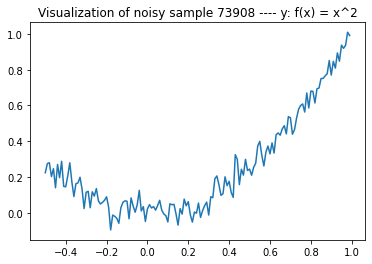

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Sample configuration
num_samples_visualize = 1
noise_factor = 0.05

# Load data
data = np.load('./signal_waves_medium.npy')
x_val, y_val = data[:,0], data[:,1]

# Add noise to data
noisy_samples = []
for i in range(0, len(x_val)):
  if i % 100 == 0:
    print(i)
  pure = np.array(y_val[i])
  noise = np.random.normal(0, 1, pure.shape)
  signal = pure + noise_factor * noise
  noisy_samples.append([x_val[i], signal])
  
# Save data to file for re-use
np.save('./signal_waves_noisy_medium.npy', noisy_samples)

# Visualize a few random samples
for i in range(0, num_samples_visualize):
  random_index = np.random.randint(0, len(noisy_samples)-1)
  x_axis, y_axis = noisy_samples[random_index]
  plt.plot(x_axis, y_axis)
  plt.title(f'Visualization of noisy sample {random_index} ---- y: f(x) = x^2')
  plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 148, 128)          512       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 146, 32)           12320     
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 148, 32)           3104      
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 150, 128)          12416     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 1)            385       
Total params: 28,737
Trainable params: 28,737
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
374/374 [==============================] - 11s 10ms/step - loss: 0.4262 - val_loss: 0.3602
Epoch 2/5
374/374

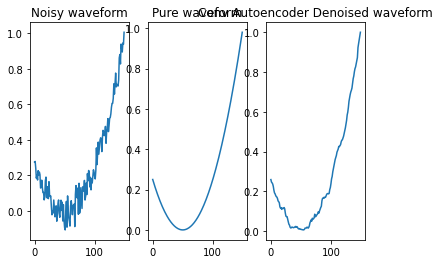

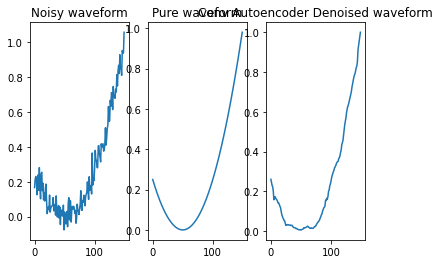

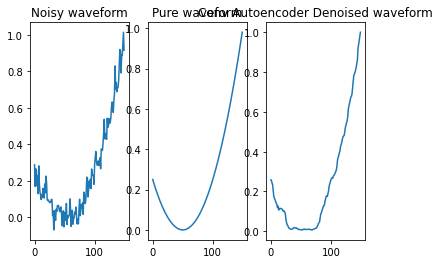

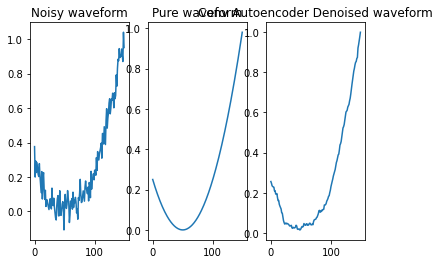

In [3]:
import tensorflow.keras
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Conv1D, Conv1DTranspose
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt
import numpy as np
import math

# Model configuration
input_shape = (150, 1)
batch_size = 150
no_epochs = 5
train_test_split = 0.3
validation_split = 0.2
verbosity = 1
max_norm_value = 2.0

# Load data
data_noisy = np.load('./signal_waves_noisy_medium.npy')
x_val_noisy, y_val_noisy = data_noisy[:,0], data_noisy[:,1]
data_pure = np.load('./signal_waves_medium.npy')
x_val_pure, y_val_pure = data_pure[:,0], data_pure[:,1]

# Reshape data
y_val_noisy_r = []
y_val_pure_r = []
for i in range(0, len(y_val_noisy)):
  noisy_sample = y_val_noisy[i]
  pure_sample = y_val_pure[i]
  noisy_sample = (noisy_sample - np.min(noisy_sample)) / (np.max(noisy_sample) - np.min(noisy_sample))
  pure_sample = (pure_sample - np.min(pure_sample)) / (np.max(pure_sample) - np.min(pure_sample))
  y_val_noisy_r.append(noisy_sample)
  y_val_pure_r.append(pure_sample)
y_val_noisy_r   = np.array(y_val_noisy_r)
y_val_pure_r    = np.array(y_val_pure_r)
noisy_input     = y_val_noisy_r.reshape((y_val_noisy_r.shape[0], y_val_noisy_r.shape[1], 1))
pure_input      = y_val_pure_r.reshape((y_val_pure_r.shape[0], y_val_pure_r.shape[1], 1))

# Train/test split
percentage_training = math.floor((1 - train_test_split) * len(noisy_input))
noisy_input, noisy_input_test = noisy_input[:percentage_training], noisy_input[percentage_training:]
pure_input, pure_input_test = pure_input[:percentage_training], pure_input[percentage_training:]

# Create the model
model = Sequential()
model.add(Conv1D(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
model.add(Conv1D(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(32, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1DTranspose(128, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
model.add(Conv1D(1, kernel_size=3, kernel_constraint=max_norm(max_norm_value), activation='sigmoid', padding='same'))

model.summary()

# Compile and fit data
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(noisy_input, pure_input,
                epochs=no_epochs,
                batch_size=batch_size,
                validation_split=validation_split)

# Generate reconstructions
num_reconstructions = 4
samples = noisy_input_test[:num_reconstructions]
reconstructions = model.predict(samples)

# Plot reconstructions
for i in np.arange(0, num_reconstructions):
  # Prediction index
  prediction_index = i + percentage_training
  # Get the sample and the reconstruction
  original = y_val_noisy[prediction_index]
  pure = y_val_pure[prediction_index]
  reconstruction = np.array(reconstructions[i])
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  # Plot sample and reconstruciton
  axes[0].plot(original)
  axes[0].set_title('Noisy waveform')
  axes[1].plot(pure)
  axes[1].set_title('Pure waveform')
  axes[2].plot(reconstruction)
  axes[2].set_title('Conv Autoencoder Denoised waveform')
  plt.show()